# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_price = requests.get(btc_url).json()
btc_price = btc_price["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_price = requests.get(eth_url).json()
eth_price = eth_price["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $49978.80
The current value of your 5.3 ETH is $17052.59


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [8]:
# Format current date as ISO format
start_date = pd.Timestamp("2020-11-30", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    limit=1000,
).df

# Preview DataFrame
df_ticker

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2020-11-30 00:00:00-05:00  118.32  118.4500  118.2500  118.400  5231566   
2020-12-01 00:00:00-05:00  118.03  118.1000  117.7300  117.840  4308362   
2020-12-02 00:00:00-05:00  117.81  117.8100  117.5400  117.705  5554915   
2020-12-03 00:00:00-05:00  117.92  117.9800  117.7650  117.910  5210910   
2020-12-04 00:00:00-05:00  117.90  117.9000  117.5133  117.580  4821820   
...                           ...       ...       ...      ...      ...   
2021-12-31 00:00:00-05:00  114.15  114.3100  114.0600  114.090  6557778   
2022-01-03 00:00:00-05:00  113.67  113.6753  113.3100  113.310  8906643   
2022-01-04 00:00:00-05:00  113.22  113.3000  113.0750  113.290  7615698   
2022-01-05 00:00:00-05:00  113.34  113.3600  112.9000  112.930  7686662   
2022-01-06 00:00:00-05:00  112.75  112.8400  112.6600  112.810  6812819   

                              SPY                                        
                             open    high       low     close    volume  
time                                                                     
2020-11-30 00:00:00-05:00  362.83  363.12  359.1700  362.0000  67154075  
2020-12-01 00:00:00-05:00  365.57  367.68  364.9300  365.9700  64527332  
2020-12-02 00:00:00-05:00  364.82  366.96  364.2000  366.7599  37323404  
2020-12-03 00:00:00-05:00  366.68  368.19  365.5000  366.6698  52905586  
2020-12-04 00:00:00-05:00  367.32  369.85  367.2200  369.8300  40264568  
...                           ...     ...       ...       ...       ...  
2021-12-31 00:00:00-05:00  475.64  476.86  474.6700  474.8900  51212452  
2022-01-03 00:00:00-05:00  476.32  477.85  473.8500  477.7600  56128214  
2022-01-04 00:00:00-05:00  479.22  479.98  475.5800  477.5100  59093344  
2022-01-05 00:00:00-05:00  477.16  477.98  468.2801  468.3800  87411658  
2022-01-06 00:00:00-05:00  467.89  470.82  465.4300  467.9300  78577470  

[279 rows x 10 columns]

In [9]:
# Pick AGG and SPY close prices
agg_close_price = df_ticker["AGG"]["close"][0]
spy_close_price = df_ticker["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.4
Current SPY closing price: $362.0


In [10]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18100.00
The current value of your 200 AGG shares is $23680.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000


# Create savings DataFrame
df_savings = pd.DataFrame(
    [my_btc_value + my_eth_value,
     my_agg_value + my_spy_value],
    columns=["Amount"],
    index=["Crypto", "Shares"]
)

# Display savings DataFrame
df_savings

,Amount
Crypto,67031.391
Shares,41780.000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='Amount'>

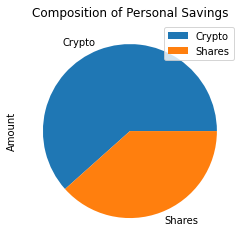

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount", title="Composition of Personal Savings")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_amount = df_savings["Amount"].sum()

# Calculate remaining amount of savings needed
remaining_amount = emergency_fund - total_amount

# Validate saving health
if total_amount > emergency_fund:
    print(f"Congrats! You have enough money in your emergency fund!")
elif total_amount == emergency_fund:
    print(f"! Not bad, your savings is equal to your emergency fund.")
else:
    print(f"Sorry! You don't have enough money in your emergency fund. You need {remaining_amount} to reach goal.")

Congrats! You have enough money in your emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-11-30', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-11-30', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Drop N/As and Display sample data
df_stock_data.dropna().head()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2016-12-09 00:00:00-05:00  108.08  108.1800  107.7200  107.83  3728544.0   
2016-12-12 00:00:00-05:00  107.70  107.8200  107.6100  107.74  2897640.0   
2016-12-13 00:00:00-05:00  107.87  107.9400  107.7101  107.86  3201106.0   
2016-12-14 00:00:00-05:00  108.07  108.1185  107.2900  107.30  3334950.0   
2016-12-15 00:00:00-05:00  107.37  107.4200  107.1500  107.16  4018431.0   

                              SPY                                        
                             open    high      low   close       volume  
time                                                                     
2016-12-09 00:00:00-05:00  225.41  226.50  225.370  226.49   59930498.0  
2016-12-12 00:00:00-05:00  226.40  226.96  225.760  226.22   61782330.0  
2016-12-13 00:00:00-05:00  227.01  228.34  227.000  227.71   69706966.0  
2016-12-14 00:00:00-05:00  227.41  228.23  225.365  225.92  103609913.0  
2016-12-15 00:00:00-05:00  226.15  227.81  226.010  226.77   77086526.0

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.dropna().head()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2016-12-12 00:00:00-05:00  107.70  107.8200  107.6100  107.74  2897640.0   
2016-12-13 00:00:00-05:00  107.87  107.9400  107.7101  107.86  3201106.0   
2016-12-14 00:00:00-05:00  108.07  108.1185  107.2900  107.30  3334950.0   
2016-12-15 00:00:00-05:00  107.37  107.4200  107.1500  107.16  4018431.0   
2016-12-16 00:00:00-05:00  107.16  107.3850  107.0600  107.22  2805978.0   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2016-12-12 00:00:00-05:00    -0.000835  226.40  226.96  225.760  226.22   
2016-12-13 00:00:00-05:00     0.001114  227.01  228.34  227.000  227.71   
2016-12-14 00:00:00-05:00    -0.005192  227.41  228.23  225.365  225.92   
2016-12-15 00:00:00-05:00    -0.001305  226.15  227.81  226.010  226.77   
2016-12-16 00:00:00-05:00     0.000560  226.01  226.08  224.670  225.07   

                                                     
                                volume daily_return  
time                                                 
2016-12-12 00:00:00-05:00   61782330.0    -0.001192  
2016-12-13 00:00:00-05:00   69706966.0     0.006587  
2016-12-14 00:00:00-05:00  103609913.0    -0.007861  
2016-12-15 00:00:00-05:00   77086526.0     0.003762  
2016-12-16 00:00:00-05:00   73808811.0    -0.007497

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989035,0.995890,0.985547,1.009424,1.000025,0.995802,0.998323,0.993421,1.013448,0.997923,...,1.007033,1.009062,1.008682,1.006001,0.990476,0.989366,1.008833,1.001916,1.006166,0.986878
2,0.994157,0.987424,0.987618,1.008508,1.001436,0.986322,0.992729,0.990819,1.013156,1.004624,...,0.997134,1.005759,1.007511,1.001363,0.984690,0.987916,1.012901,1.001412,1.011742,0.983366
3,1.004396,0.974185,1.000562,1.005384,0.993806,0.982310,0.997187,0.980681,1.008355,0.995135,...,0.986868,1.015804,1.000970,1.004184,0.983118,0.988740,1.019764,0.991765,1.021430,0.981657
4,1.010521,0.979143,0.985693,1.009639,1.000129,0.984678,0.998116,0.982677,1.011769,1.001467,...,0.983689,1.022751,1.003623,1.005719,0.980844,1.001307,1.018705,0.998455,1.037504,0.983377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.156408,41.124888,23.925391,22.195684,17.466952,11.523000,19.604287,10.251348,13.135150,10.078763,...,20.645734,8.449145,9.987546,12.521255,38.387911,17.539150,7.344036,25.204354,9.324229,12.013922
7557,10.276262,40.878608,23.696244,22.163355,17.278727,11.501566,19.528963,10.224529,13.203776,10.079378,...,20.386345,8.488714,10.094397,12.508216,38.310976,17.449915,7.295234,25.364471,9.386020,12.134522
7558,10.340530,41.143674,23.563881,22.237318,17.149739,11.571775,19.428234,10.203935,13.145151,9.941546,...,20.484760,8.539254,10.067960,12.461530,38.212774,17.172781,7.251861,25.328616,9.395207,12.035062
7559,10.357841,40.972122,23.627123,22.401272,17.282712,11.683523,19.402219,10.325260,13.061401,9.962995,...,20.470810,8.581583,10.055641,12.444325,38.003314,17.350362,7.277802,25.316967,9.268763,11.955218


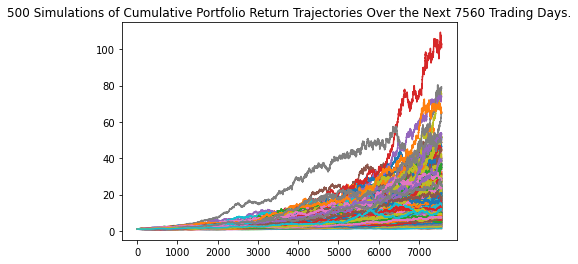

In [19]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

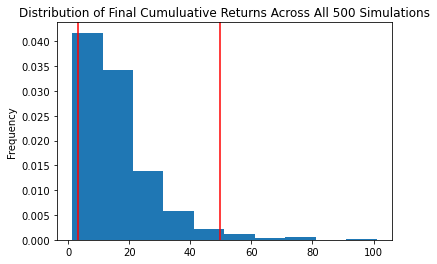

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
tbl

count           500.000000
mean             16.459028
std              12.350908
min               1.249766
25%               8.328681
50%              13.278589
75%              20.708137
max             100.982918
95% CI Lower      3.012249
95% CI Upper     49.639719
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $60244.99 and $992794.37


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $90367.48 and $1489191.56


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008762,0.997492,0.990261,1.000801,1.009276,0.997370,0.998274,1.007002,0.997116,1.009265,...,0.997555,1.007141,1.004145,0.997199,1.004678,1.001357,0.997202,0.982247,0.995574,0.987812
2,1.023962,1.003609,0.978210,1.004973,0.994146,0.992897,0.994955,1.004697,0.994264,1.014430,...,0.994686,1.003147,1.001086,0.991010,1.002227,0.991690,0.997895,0.980170,0.990797,0.987513
3,1.022805,1.007833,0.966468,1.006554,0.988224,1.004432,0.989948,1.008664,0.995375,1.008808,...,0.993257,0.994264,1.015485,0.989382,1.003816,0.983328,0.997719,0.979670,0.988667,0.999464
4,1.018895,1.009198,0.967289,0.991413,0.982258,1.009865,0.994976,1.000435,1.003629,0.998113,...,0.982041,0.985776,1.020228,0.989801,0.989817,0.987747,1.002155,0.994021,0.970238,0.997387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.844238,1.412748,2.004854,1.611668,1.467383,1.586386,0.913113,1.108290,1.118154,1.420269,...,1.367907,1.469053,1.507638,1.659776,1.551332,2.505465,1.630983,1.090412,1.493053,1.398937
1257,1.837627,1.426553,2.005901,1.594662,1.459252,1.567122,0.922162,1.106365,1.132941,1.402681,...,1.392398,1.476871,1.527892,1.661617,1.548164,2.505272,1.623793,1.083989,1.504174,1.386555
1258,1.818325,1.426110,1.995304,1.593087,1.444872,1.564317,0.925917,1.115639,1.139525,1.395586,...,1.398586,1.476685,1.512810,1.670397,1.549448,2.507440,1.642914,1.082508,1.514390,1.393758
1259,1.807925,1.430264,1.987192,1.592433,1.444256,1.570973,0.911650,1.127421,1.136367,1.398761,...,1.395055,1.497390,1.517647,1.668141,1.537345,2.527927,1.644505,1.068530,1.514850,1.399031


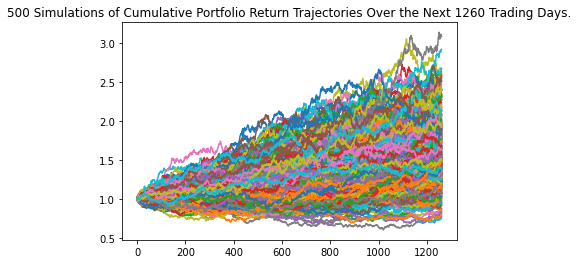

In [26]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

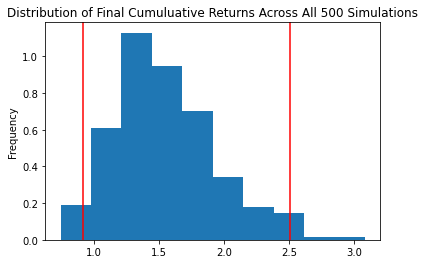

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5 = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
tbl_5

count           500.000000
mean              1.553260
std               0.394701
min               0.746402
25%               1.263635
50%               1.492343
75%               1.791701
max               3.083292
95% CI Lower      0.919947
95% CI Upper      2.507270
Name: 1260, dtype: float64

In [29]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*60000,2)
ci_upper_five = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $180734.96 and $2978383.12


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.015992,0.991145,0.995529,0.985102,1.003631,0.996556,1.012826,1.017105,1.000908,1.000986,...,0.997931,0.990048,1.014152,0.992236,1.010084,0.997111,0.997481,1.003881,1.007566,0.996913
2,1.017401,0.985621,1.000792,0.988361,1.008718,1.002747,1.027379,1.017782,1.001708,1.001086,...,0.994495,0.982883,1.024319,0.987381,1.015281,0.988166,0.999548,0.996375,1.001301,0.993832
3,1.015094,0.982574,1.000519,0.988484,1.003818,0.996314,1.018292,1.028182,1.001357,1.004499,...,0.996998,0.979033,1.020282,0.988481,1.020807,0.992927,1.006115,0.997033,0.997618,0.985884
4,1.014817,0.979182,0.995207,0.990127,1.001124,1.009830,1.009241,1.022062,0.997718,0.998975,...,1.004215,0.987807,1.012022,0.981633,1.037180,0.993308,1.007949,0.993538,1.001913,0.982895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.051845,1.547775,2.605806,2.406486,2.183384,2.125829,1.581903,4.001285,1.480135,2.242589,...,2.626754,1.030859,2.378493,1.850015,3.304674,2.473440,2.263638,4.130497,1.544069,2.707130
2517,3.021704,1.538042,2.574434,2.430609,2.174055,2.100730,1.573010,4.003748,1.470480,2.254224,...,2.642255,1.013233,2.373657,1.855304,3.286986,2.489059,2.281012,4.118887,1.561357,2.707034
2518,3.025570,1.530588,2.553358,2.420880,2.204660,2.103121,1.576816,3.995076,1.455858,2.247613,...,2.680316,1.014915,2.364452,1.878204,3.304656,2.454323,2.278060,4.136982,1.563243,2.680511
2519,3.004616,1.539488,2.571707,2.395017,2.192749,2.088448,1.577104,4.045364,1.454273,2.246366,...,2.695183,1.030236,2.395641,1.862887,3.301156,2.465166,2.297437,4.113441,1.554710,2.660669


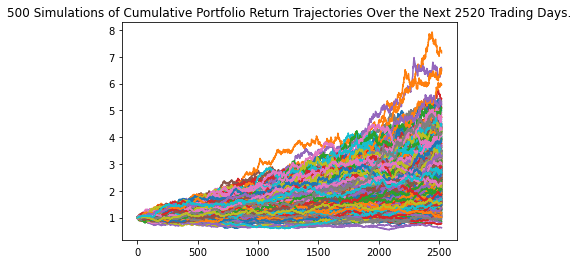

In [32]:
# Plot simulation outcomes
line_plot = MC_tenyear.plot_simulation()

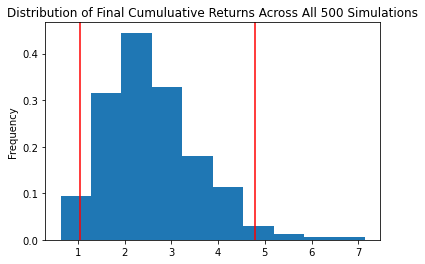

In [33]:
# Plot probability distribution and confidence intervals
dist_plot = MC_tenyear.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10 = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
tbl_10

count           500.000000
mean              2.574035
std               1.001000
min               0.622340
25%               1.867066
50%               2.422569
75%               3.109640
max               7.143244
95% CI Lower      1.034971
95% CI Upper      4.799633
Name: 2520, dtype: float64

In [35]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*60000,2)
ci_upper_ten = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $180734.96 and $2978383.12
